In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [2]:
mnist= tf.keras.datasets.mnist

In [3]:
(train_images,train_labels),(test_images,test_labels)= mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

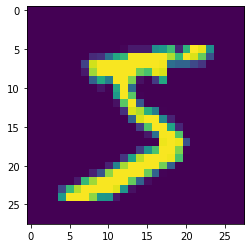

In [4]:
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
print(train_images[0])
print(train_labels[0])

In [5]:
train_images= train_images/255.0
test_images= test_images/255.0

In [6]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.998):
      print('\n Reached 60% accuracy so stopped training')
      self.model.stop_training=True

In [7]:
callbacks= mycallback()
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128,activation= tf.nn.relu),
                                   tf.keras.layers.Dense(10,activation= tf.nn.softmax)])

In [8]:
model.compile(optimizer= tf.optimizers.Adam(),loss= 'sparse_categorical_crossentropy',metrics= ['accuracy'])
history= model.fit(train_images,train_labels,epochs=10,callbacks= [callbacks])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2569 - accuracy: 0.9271
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1096 - accuracy: 0.9674
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0758 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0567 - accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0447 - accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0348 - accuracy: 0.9895
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0271 - accuracy: 0.9917
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0226 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0181 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.016

In [9]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.0792 - accuracy: 0.9777


[0.07918965071439743, 0.9776999950408936]

In [10]:
classifications= model.predict(test_images)
print(classifications[0])
print(np.argmax(classifications[0]))

[1.9887891e-09 1.1550089e-11 6.5079952e-08 1.4531352e-05 9.2522828e-16 1.3177043e-10 5.9913545e-19 9.9997902e-01 9.0946656e-10 6.3199946e-06]
7


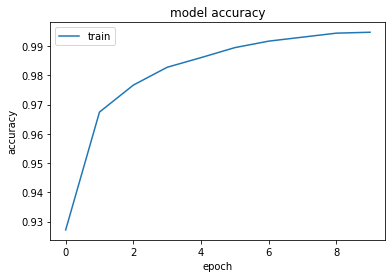

In [11]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

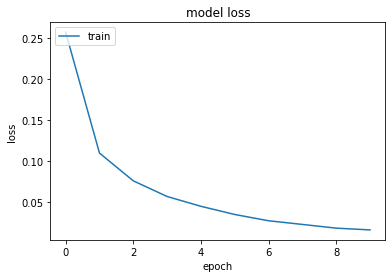

In [12]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [13]:
import numpy as np
p=model.predict(test_images)
p = [np.argmax(x) for x in p]

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,p))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.99      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.95      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [15]:
labels = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

cm=confusion_matrix(test_labels,p)                        
print(cm)

[[ 971    0    1    1    1    0    2    1    3    0]
 [   0 1126    4    1    0    1    1    0    2    0]
 [   2    2 1010    3    2    0    2    2    8    1]
 [   0    1    8  984    0    4    0    3    2    8]
 [   0    0    3    1  962    1    4    0    0   11]
 [   2    0    0    9    1  870    3    1    1    5]
 [   2    2    2    1    3    7  940    0    1    0]
 [   1    7   12    5    0    0    0  987    4   12]
 [   2    0    5    5    1    9    4    2  934   12]
 [   0    4    0    2    5    1    1    3    0  993]]


In [16]:
model.save('mnist_nn.h5')

In [17]:
!pip install streamlit  

     |████████████████████████████████| 7.2MB 2.8MB/s 
     |████████████████████████████████| 112kB 44.5MB/s 
     |████████████████████████████████| 102kB 8.7MB/s 
     |████████████████████████████████| 4.4MB 45.0MB/s 
     |████████████████████████████████| 122kB 38.6MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=d33d49decbb420da5cde98bd0991d57e3c93e5c76241f9e64b3f2cc5c6902921
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73873 sha256=e919e3338d57fb4a4bd943ef223a3731cbbaea279ec5c2f3633f22257cc5afba
  Stored in directory: /root/.cache/pip/wheels/a8/1d/38/2c19bb311f67cc7b4d07a2ec5ea36ab1a0a0ea50db994a5bc7
  Created wheel for pathtools: filename=pathtools-0.1.2-cp36-none-any.whl size=8785 sha256=102e28ad3a9d2c2a19e8b8d7f65cb238e8da58b0bc8737aadb17ae613482df1e
  Stored in directory: /root/.cache/pip/wheel

In [1]:
!pip install pyngrok

  Created wheel for pyngrok: filename=pyngrok-4.1.11-cp36-none-any.whl size=16680 sha256=19588e301705ae0d7edc3df7a1301566119d649dac1b961a2803ac6f742ab6e0
  Stored in directory: /root/.cache/pip/wheels/b9/d8/ae/5a29960e0fddbd2bf852bfa93d841dd8b1aa23851e81687f85
Successfully built pyngrok


In [6]:
%%writefile app.py
import streamlit as st
import tensorflow as tf

st.set_option('deprecation.showfileUploaderEncoding', False)
@st.cache(allow_output_mutation= True)
def load_model():
  model= tf.keras.models.load_model('/content/mnist_nn.h5')
  return model
model= load_model()
st.write(""" # Image classification """) 
file= st.file_uploader("Please upload an image", type= ['jpg','png','jpeg'])
import cv2
from PIL import Image,ImageOps
import numpy as np
def import_and_predict(image_data,model):
  size= (28,28)
  image= ImageOps.fit(image_data,size,Image.ANTIALIAS)
  img= np.asarray(image)
  img_reshape= img[np.newaxis,...]
  prediction= model.predict(img_reshape)
  return prediction
if file is None:
  st.text('Pls upload an img file')
else:
  image= Image.open(file)
  st.image(image, use_column_width= True)
  predictions= import_and_predict(image, model)
  classes= ['0','1','2','3','4','5','6','7','8','9']
  string= 'This image may be:'+classes[np.argmax(predictions)]
  st.success(string)

Overwriting app.py


In [7]:
!ngrok authtoken 1hKdNYMuRGgXW2I5gqnm64ve9VX_Lc8eUsb2bvwZbcVVsgZd

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [8]:
!nohup streamlit run app.py & 

nohup: appending output to 'nohup.out'


In [9]:
from pyngrok import ngrok
url= ngrok.connect(port= 8501)
url

'http://10f10a2f6142.ngrok.io'

In [10]:
!cat '/content/nohup.out'

2020-09-10 18:49:59.096734: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.231.238.157:8501

2020-09-10 18:50:00.480106: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-09-10 18:50:00.483483: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-09-10 18:50:00.483541: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a0858240d2c9): /proc/driver/nvidia/version does not exist
2020-09-10 18:50:00.504924: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2300000000 Hz
2020-09-10 18:50:00.505180: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1